In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('placement.csv')
print(df.shape)

(100, 3)


In [3]:
df.head()

,cgpa,resume_score,placed
0,8.14,6.52,1
1,6.17,5.17,0
2,8.27,8.86,1
3,6.88,7.27,1
4,7.52,7.30,1


<AxesSubplot:xlabel='cgpa', ylabel='resume_score'>

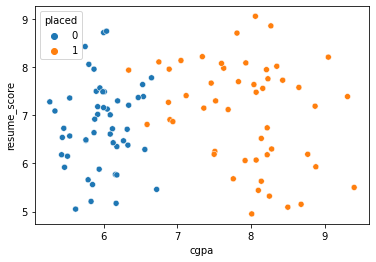

In [6]:
sns.scatterplot(x='cgpa',y='resume_score',data=df,hue='placed')

In [7]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [8]:
from sklearn.linear_model import Perceptron
p = Perceptron()

In [9]:
p.fit(X,y)

Perceptron()

In [10]:
p.coef_

array([[ 40.26, -36.  ]])

In [11]:
p.intercept_

array([-25.])

In [14]:
from mlxtend.plotting import plot_decision_regions

In [13]:
pip install mlxtend

     ---------------------------------------- 1.3/1.3 MB 883.5 kB/s eta 0:00:00



C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


<AxesSubplot:>

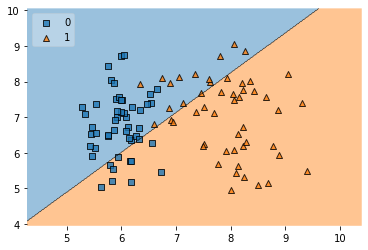

In [15]:
plot_decision_regions(X.values, y.values, clf=p, legend=2)


# perceptron trick

In [16]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)

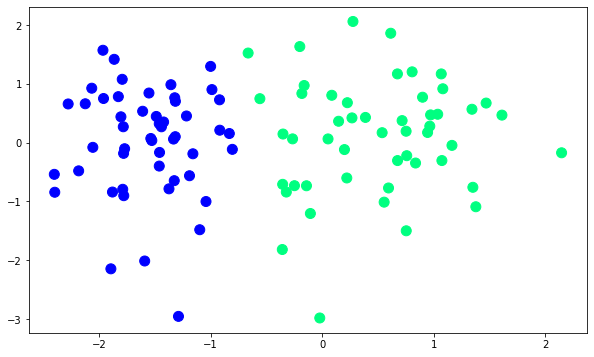

In [17]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)


In [18]:
def perceptron(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
    return weights[0],weights[1:]
        

In [19]:
def step(z):
    return 1 if z>0 else 0

In [20]:
intercept_,coef_ = perceptron(X,y)

In [21]:
print(coef_)
print(intercept_)

[1.32258771 0.07786986]
1.0


In [22]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])